# RNA Seq Using Bucket Data (by Mike Lloyd)
This is a sample notebook to process RNA sequnce data stored in GCP bucket

In [1]:
# Install and load libraries
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# set working directory and copy data from bucket to the working directory
setwd("/home/jupyter/R/demo")
system(paste0("gsutil cp gs://jax-cube-prd-ctrl-01-project-data/processed-rna-seq/Hongping_R_Notebook_Demo/* ."),intern=TRUE)

character(0)

In [3]:
# Load Data 
liver_log_file <- read.table(file="Liver_Data_QC_LogParse.txt",sep="\t",header=T)
adipose_log_file <- read.table(file="Adipose_Data_QC_LogParse.txt",sep="\t",header=T)

In [4]:
# Add annotation for plotting
liver_log_file$type <- 'Liver'
adipose_log_file$type <- 'Adipose'

In [5]:
# Merge data
merged_logs <- rbind(liver_log_file,adipose_log_file)

In [6]:
# Set ggplot theme
theme<-theme(panel.background = 
element_blank(),panel.border=element_rect(fill=NA),panel.grid.major = 
element_blank(),panel.grid.minor = 
element_blank(),strip.background=element_blank(),axis.text.x=element_text(colour="black"),axis.text.y=element_text(colour="black"),axis.ticks=element_line(colour="black"),plot.margin=unit(c(1,1,1,1),"line"))

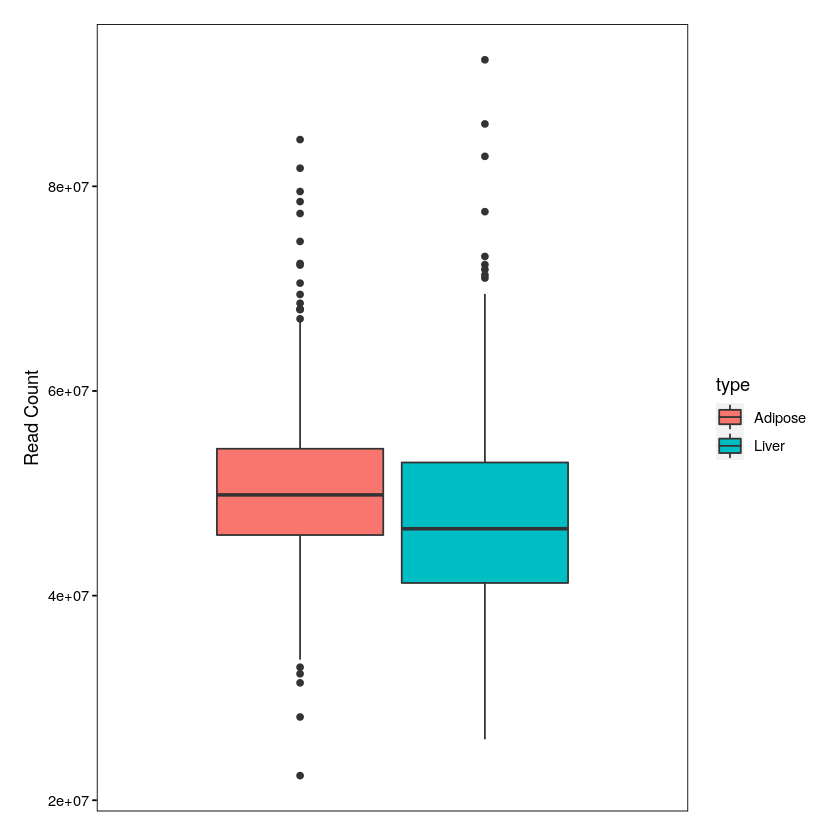

In [7]:
# Example plot: Total Read Count
ggplot(data = merged_logs, aes(x=factor(0), y=input_read_count, fill=type)) +
  geom_boxplot() + ylab('Read Count') + xlab('') + theme + xlab(label = '') +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

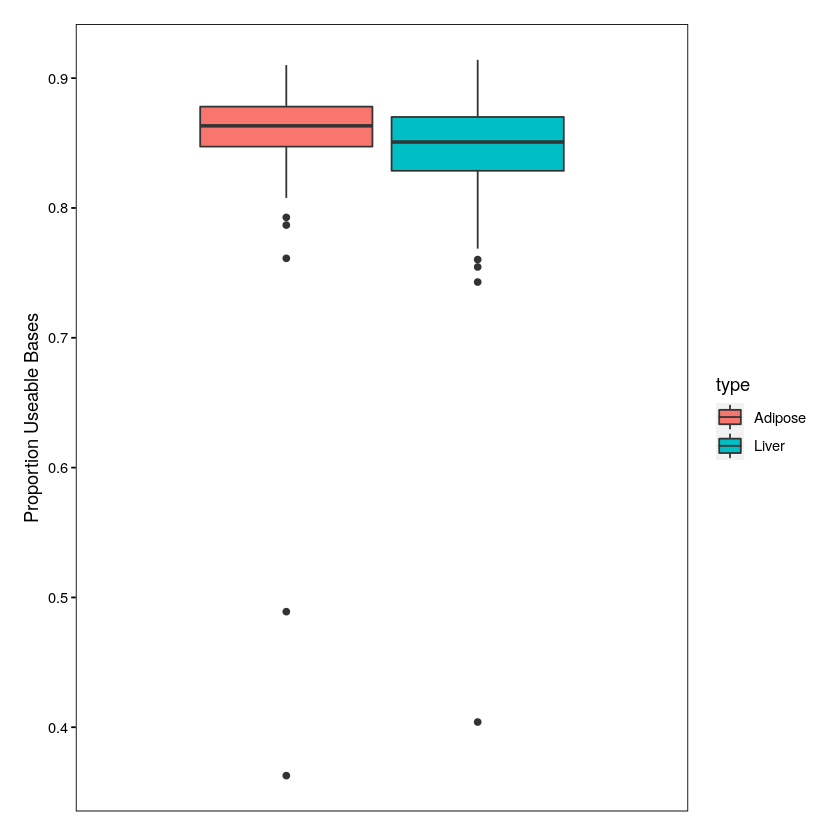

In [8]:
# Example Plot: Proportion Useable Bases
ggplot(data = merged_logs, aes(x=factor(0), y=prop_usable_bases, fill=type)) +
  geom_boxplot() + ylab('Proportion Useable Bases') + xlab('') + theme + xlab(label = '') +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

In [18]:
# write the merged data to a file
write.csv(merged_logs, "merged_logs.csv", row.names = TRUE)

In [19]:
# save back to bucket
system(paste0("gsutil cp merged_logs.csv gs://jax-cube-prd-ctrl-01-project-data/processed-rna-seq/Hongping_R_Notebook_Demo/merged_logs.csv"),intern=TRUE)

system(paste0("gsutil ls gs://jax-cube-prd-ctrl-01-project-data/processed-rna-seq/Hongping_R_Notebook_Demo"),intern=TRUE)


character(0)

[1] "gs://jax-cube-prd-ctrl-01-project-data/processed-rna-seq/Hongping_R_Notebook_Demo/Adipose_Data_QC_LogParse.txt"
[2] "gs://jax-cube-prd-ctrl-01-project-data/processed-rna-seq/Hongping_R_Notebook_Demo/LiverData_QC_Plot_Simple.Rmd"
[3] "gs://jax-cube-prd-ctrl-01-project-data/processed-rna-seq/Hongping_R_Notebook_Demo/Liver_Data_QC_LogParse.txt"  
[4] "gs://jax-cube-prd-ctrl-01-project-data/processed-rna-seq/Hongping_R_Notebook_Demo/merged_logs.csv"